Saving clean_malware_dataset.xlsx to clean_malware_dataset.xlsx
Dataset Loaded Successfully!
                               hash  t_0  t_1  t_2  t_3  t_4  t_5  t_6  t_7  \
0  071e8c3f8922e186e57548cd4c703a5d  112  274  158  215  274  158  215  298   
1  33f8e6d08a6aae939f25a8e0d63dd523   82  208  187  208  172  117  172  117   
2  b68abd064e975e1c6d5f25e748663076   16  110  240  117  240  117  240  117   
3  72049be7bd30ea61297ea624ae198067   82  208  187  208  172  117  172  117   
4  c9b3700a77facf29172f32df6bc77f48   82  240  117  240  117  240  117  240   

   t_8  ...  t_91  t_92  t_93  t_94  t_95  t_96  t_97  t_98  t_99  malware  
0   76  ...    71   297   135   171   215    35   208    56    71        1  
1  172  ...    81   240   117    71   297   135   171   215    35        1  
2  240  ...    65   112   123    65   112   123    65   113   112        1  
3  172  ...   208   302   208   302   187   208   302   228   302        1  
4  117  ...   209   260    40   209   260   141

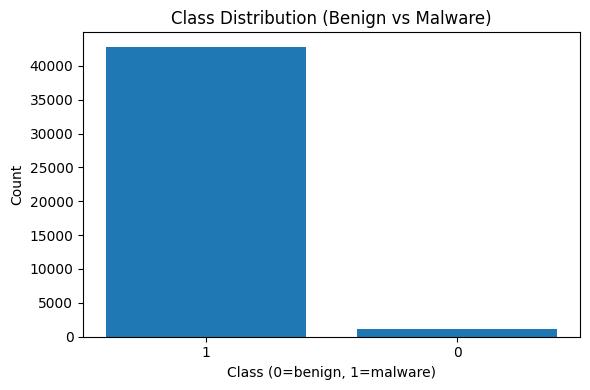

Accuracy: 0.9890610756608933
Confusion Matrix:
 [[ 127   89]
 [   7 8553]]


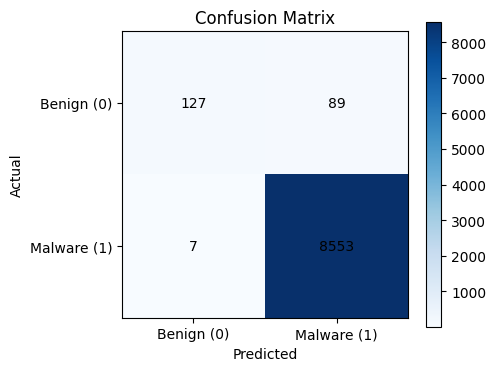

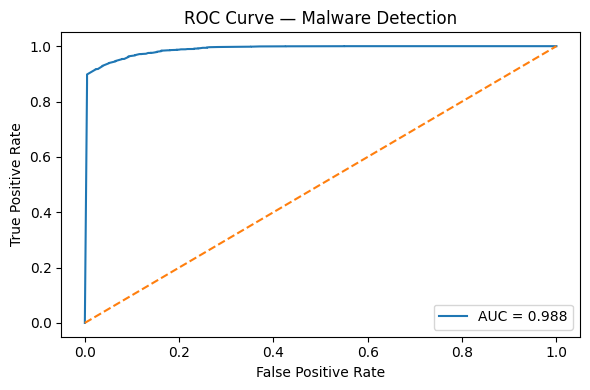

ROC AUC Score: 0.9880892501730703


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Output Saved & Downloaded: malware_predictions_output.csv


In [1]:
#===========================
# INSTALL PACKAGES
#===========================
!pip install scikit-learn pandas matplotlib openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from google.colab import files

#===========================
# 1. UPLOAD MALWARE DATASET
#===========================
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# If file is Excel
df = pd.read_excel("clean_malware_dataset")

print("Dataset Loaded Successfully!")
print(df.head())
print(df.columns)

#===========================
# 2. BAR GRAPH — CLASS COUNT
#===========================
label_counts = df["malware"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(label_counts.index.astype(str), label_counts.values)
plt.title("Class Distribution (Benign vs Malware)")
plt.xlabel("Class (0=benign, 1=malware)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#===========================
# 3. SPLIT DATA
#===========================
X = df.drop(columns=["malware", "hash"], errors="ignore")
y = df["malware"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#===========================
# 4. SCALING (IMPORTANT)
#===========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#===========================
# 5. TRAIN MODEL
#===========================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

#===========================
# 6. ACCURACY + PREDICTIONS
#===========================
pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, pred)
print("Accuracy:", acc)

#===========================
# 7. CONFUSION MATRIX
#===========================
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()

plt.xticks([0,1], ["Benign (0)", "Malware (1)"])
plt.yticks([0,1], ["Benign (0)", "Malware (1)"])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

#===========================
# 8. ROC CURVE
#===========================
y_prob = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.plot([0,1], [0,1], '--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Malware Detection")
plt.legend()
plt.tight_layout()
plt.show()

print("ROC AUC Score:", roc_auc)

#===========================
# 9. SAVE OUTPUT FILE
#===========================
output = pd.DataFrame({
    "True_Label": y_test,
    "Predicted": pred
})

output_file = "malware_predictions_output.csv"
output.to_csv(output_file, index=False)

files.download(output_file)

print("Output Saved & Downloaded:", output_file)